In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

voice.csv



In [2]:
df = pd.read_csv('../input/voice.csv')

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [5]:
df.shape

(3168, 21)

In [6]:
#For normally distributed data, the skewness should be about 0. 
#A skewness value > 0 means that there is more weight in the left tail of the distribution. 

df.skew()

meanfreq   -0.617495
sd          0.136916
median     -1.012785
Q25        -0.490877
Q75        -0.900311
IQR         0.295432
skew        4.933314
kurt        5.872586
sp.ent     -0.430934
sfm         0.339958
mode       -0.837236
centroid   -0.617495
meanfun     0.039141
minfun      1.878004
maxfun     -2.238535
meandom     0.611022
mindom      1.661114
maxdom      0.726189
dfrange     0.728261
modindx     2.064335
dtype: float64

In [7]:
#Finding Correlation among the features
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [8]:
df.isnull().sum()
#This shows that our data has no missing values in it. That is good!

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
print("Total number ber of people involve in the test: {}".format(df.shape[0]))
print("Number of Male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of Female: {}".format(df[df.label == 'female'].shape[0]))

#It proves the data contain same number of male and female labels

Total number ber of people involve in the test: 3168
Number of Male: 1584
Number of Female: 1584


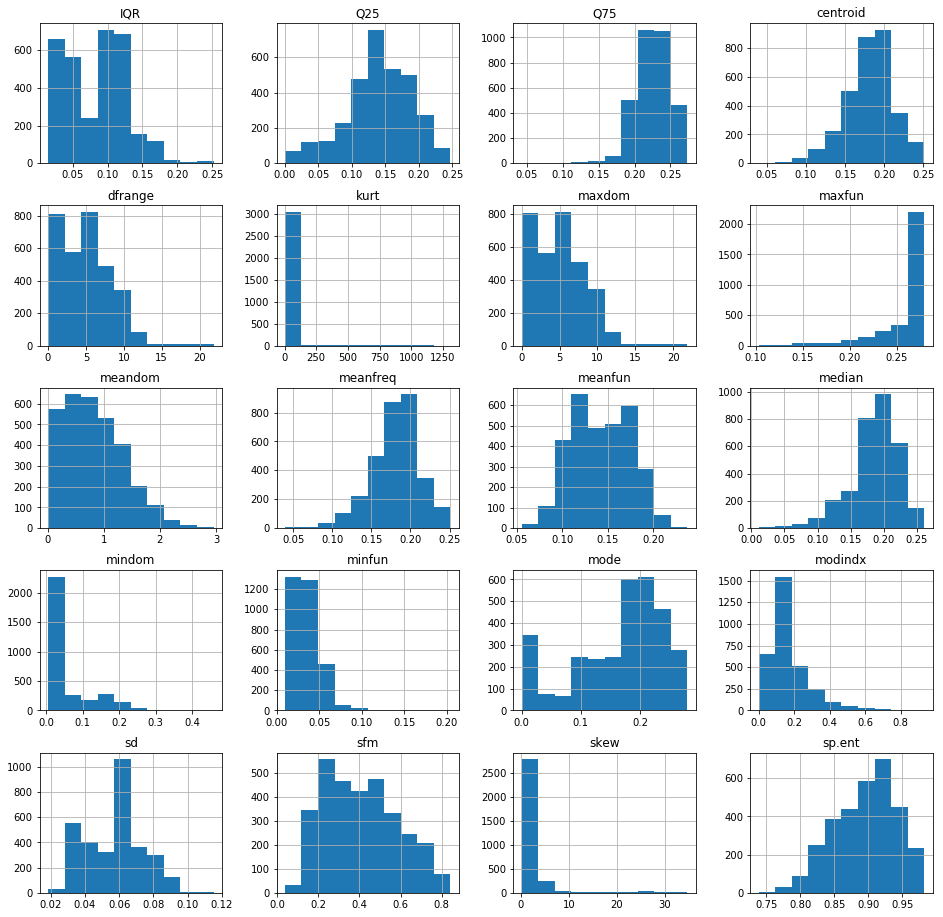

In [10]:
#Visualising individual features of our data
df.hist(figsize=(16,16))
plt.show()

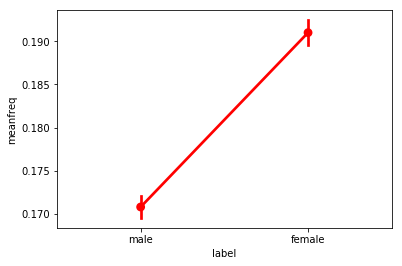

In [11]:
#Finding the relationship between independent and dependent variable(Label)
sns.pointplot(x='label',y='meanfreq',data=df,color='red',alpha=0.8,label = 'a')

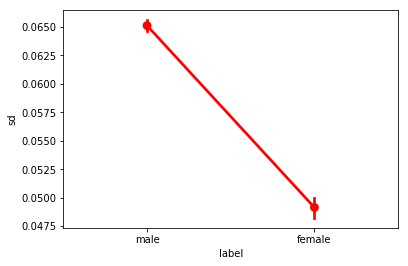

In [12]:
sns.pointplot(x='label',y='sd',data=df,color='red',alpha=0.8,label = 'a')

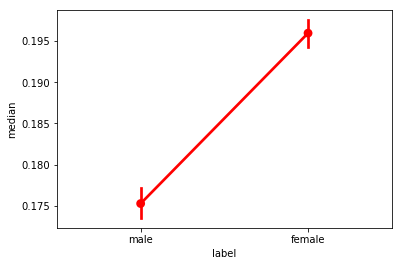

In [13]:
sns.pointplot(x='label',y='median',data=df,color='red',alpha=0.8,label = 'a')

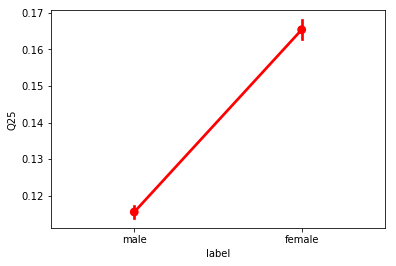

In [14]:
sns.pointplot(x='label',y='Q25',data=df,color='red',alpha=0.8,label = 'a')

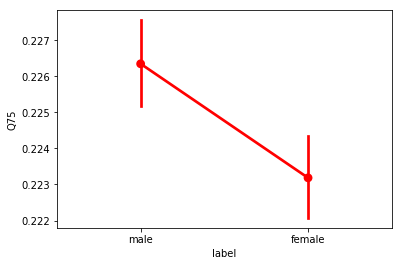

In [15]:
sns.pointplot(x='label',y='Q75',data=df,color='red',alpha=0.8,label = 'a')

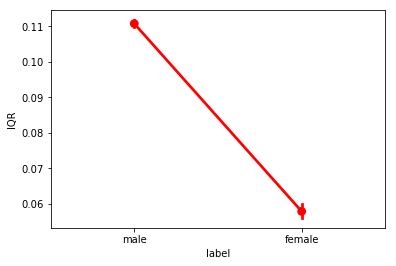

In [16]:
sns.pointplot(x='label',y='IQR',data=df,color='red',alpha=0.8,label = 'a')

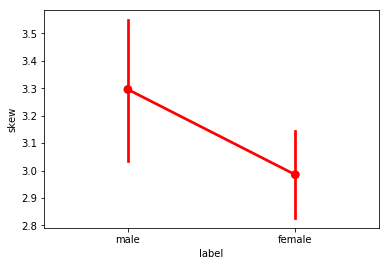

In [17]:
sns.pointplot(x='label',y='skew',data=df,color='red',alpha=0.8,label = 'a')

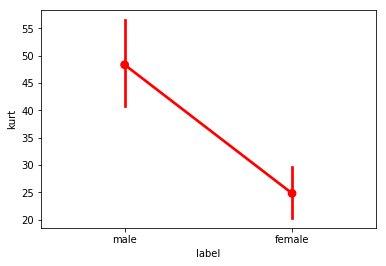

In [18]:
sns.pointplot(x='label',y='kurt',data=df,color='red',alpha=0.8,label = 'a')

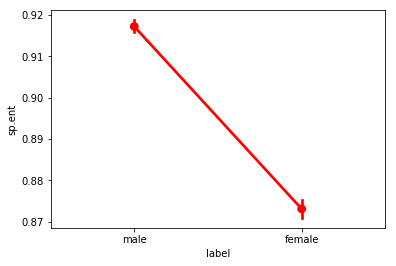

In [19]:
sns.pointplot(x='label',y='sp.ent',data=df,color='red',alpha=0.8,label = 'a')

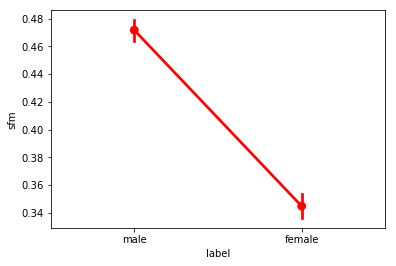

In [20]:
sns.pointplot(x='label',y='sfm',data=df,color='red',alpha=0.8,label = 'a')

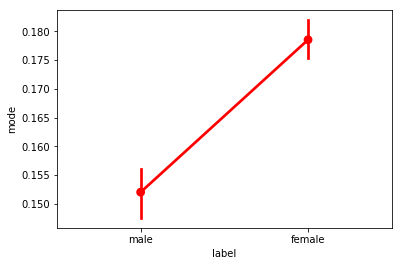

In [21]:
sns.pointplot(x='label',y='mode',data=df,color='red',alpha=0.8,label = 'a')

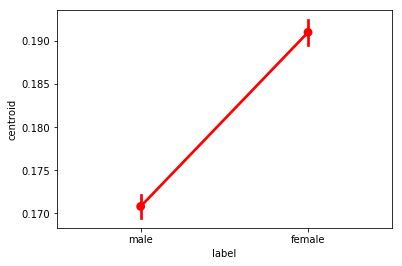

In [22]:
sns.pointplot(x='label',y='centroid',data=df,color='red',alpha=0.8,label = 'a')

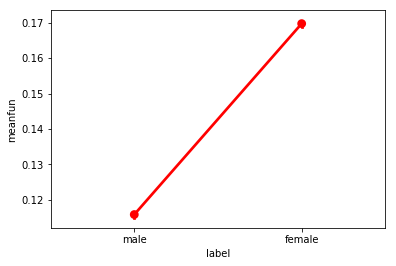

In [23]:
sns.pointplot(x='label',y='meanfun',data=df,color='red',alpha=0.8,label = 'a')

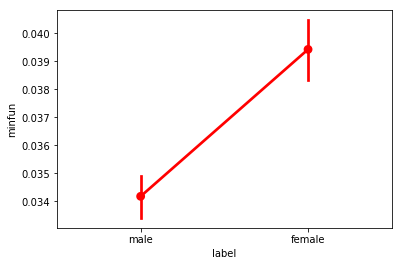

In [24]:
sns.pointplot(x='label',y='minfun',data=df,color='red',alpha=0.8,label = 'a')

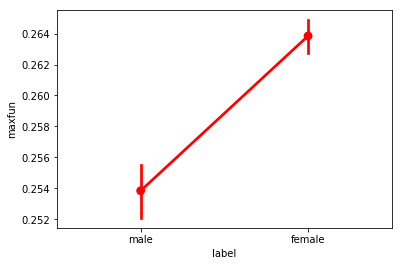

In [25]:
sns.pointplot(x='label',y='maxfun',data=df,color='red',alpha=0.8,label = 'a')

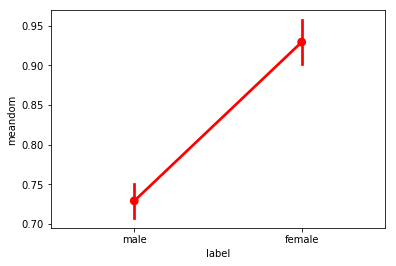

In [26]:
sns.pointplot(x='label',y='meandom',data=df,color='red',alpha=0.8,label = 'a')

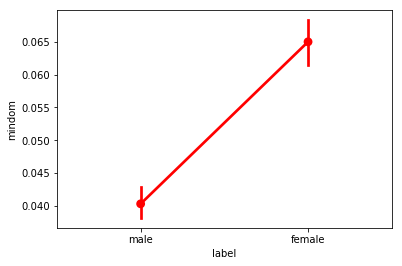

In [27]:
sns.pointplot(x='label',y='mindom',data=df,color='red',alpha=0.8,label = 'a')

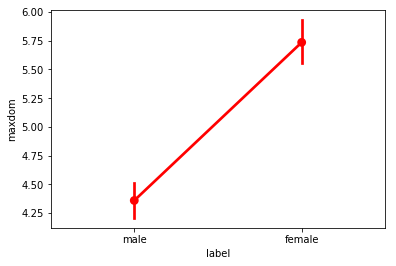

In [28]:
sns.pointplot(x='label',y='maxdom',data=df,color='red',alpha=0.8,label = 'a')

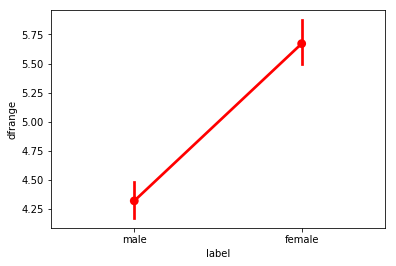

In [29]:
sns.pointplot(x='label',y='dfrange',data=df,color='red',alpha=0.8,label = 'a')

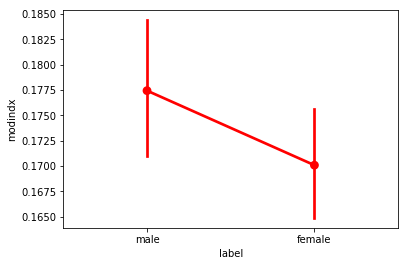

In [30]:
sns.pointplot(x='label',y='modindx',data=df,color='red',alpha=0.8,label = 'a')

In [31]:
X = df.iloc[:,:-1]
X.head()
#Now X contains all the features except labels

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [32]:
#Saving labels in variable y
y = df.iloc[:,-1]
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [33]:
#Now we are encoding the labels in the form of ones and zeros
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [34]:
print(y)
#It shows that our labels are encoded as ones and zeros
#One = Male
#Zero = Female

[1 1 1 ..., 0 0 0]


In [35]:
#Splitting our data into train and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
#Applying feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [37]:
#Now we are applying SVM algorithm and using Linear Kernal
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[301,  10],
       [  7, 316]])

In [40]:
accuracy1 = ((286+328)/(286+328+12+8)) * 100
print(accuracy1)
#We got an accuracy of 96.37% by applying by applying Linear Kernel

96.84542586750788


In [41]:
#Now we are applying SVM algorithm and using RBF Kernal
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[303,   8],
       [  7, 316]])

In [44]:
accuracy2 = ((290+330)/(290+330+10+4)) * 100
print(accuracy2)
#We got an accuracy of 96.37% by applying by applying RBF Kernel

97.79179810725552


In [45]:
#Now we are applying SVM algorithm and using Polynomial Kernal
from sklearn.svm import SVC
classifier = SVC(kernel='poly',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
y_pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[283,  28],
       [  5, 318]])

In [48]:
accuracy3 = ((278+333)/(278+333+7+16)) * 100
print(accuracy3)
#We got an accuracy of 96.37% by applying by applying Polynomial Kernel

96.37223974763407


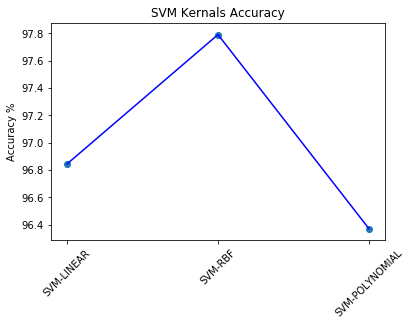

In [49]:
#Comparring results of different Kernals
objects = ('SVM-LINEAR', 'SVM-RBF', 'SVM-POLYNOMIAL')
y_pos = np.arange(len(objects))
performance = [accuracy1,accuracy2,accuracy3]
 
plt.scatter(y_pos, performance, alpha=1)
plt.plot(y_pos, performance,color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy %')
plt.xticks(rotation=45)
plt.title('SVM Kernals Accuracy')
plt.show()

In [50]:
#In conclusion
print("We got an accuracy of {}".format(accuracy1),"by applying SVM using Linear Kernal ")
print("We got an accuracy of {}".format(accuracy2),"by applying SVM using RBF Kernal ")
print("We got an accuracy of {}".format(accuracy3),"by applying SVM using Polynomial Kernal ")

We got an accuracy of 96.84542586750788 by applying SVM using Linear Kernal 
We got an accuracy of 97.79179810725552 by applying SVM using RBF Kernal 
We got an accuracy of 96.37223974763407 by applying SVM using Polynomial Kernal 
